In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.parameters import PROCESSED_DATA_DIR, ANIMALS, COLORS
from loren_frank_data_processing import make_epochs_dataframe, read_analysis_files

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info = epoch_info.loc[
    (epoch_info.type == 'run') &
    (epoch_info.environment != 'lin')]
epoch_keys = epoch_info.index

In [4]:
def preprocess(ds):
    return ds.drop(['start_time', 'end_time', 'ripple_duration', 'animal', 'day', 'epoch'])

replay_info = (read_analysis_files(
    PROCESSED_DATA_DIR, epoch_keys, group='/replay_info',
    preprocess=preprocess)
    .reset_index('recording_session')
     .to_dataframe()
     .dropna()
     .set_index(['animal', 'day', 'epoch', 'ripple_number']))

In [5]:
replay_info.head(5)

predicted_state  predicted_state_probability  \
animal day epoch ripple_number                                                  
Cor    1   2     1.0            Outbound-Forward                     0.678235   
       5   2     1.0            Outbound-Forward                     0.372108   
HPa    2   4     1.0            Outbound-Forward                     0.784712   
       4   2     1.0            Outbound-Forward                     0.509184   
       5   2     1.0            Outbound-Forward                     0.538827   

                               replay_task replay_order session_time  \
animal day epoch ripple_number                                         
Cor    1   2     1.0              Outbound      Forward        early   
       5   2     1.0              Outbound      Forward        early   
HPa    2   4     1.0              Outbound      Forward        early   
       4   2     1.0              Outbound      Forward        early   
       5   2     1.0              Outbound      Forward        early   

                                number_of_unique_spiking  number_of_spikes  \
animal day epoch ripple_number                                               
Cor    1   2     1.0                                10.0              21.0   
       5   2     1.0                                 8.0              22.0   
HPa    2   4     1.0                                13.0              88.0   
       4   2     1.0                                 9.0              37.0   
       5   2     1.0                                10.0              44.0   

                                labeled_segments from_well to_well      task  \
animal day epoch ripple_number                                                 
Cor    1   2     1.0                         5.0    center  center  Outbound   
       5   2     1.0                         2.0    center  center  Outbound   
HPa    2   4     1.0                         2.0    center   right  Outbound   
       4   2     1.0                         2.0    center   right  Outbound   
       5   2     1.0                         2.0    center    left  Outbound   

                                is_correct  linear_distance  x_position  \
animal day epoch ripple_number                                            
Cor    1   2     1.0                   0.0        24.712378      279.30   
       5   2     1.0                   0.0        24.822550      287.28   
HPa    2   4     1.0                   1.0        34.113488       84.00   
       4   2     1.0                   0.0        84.053708       91.00   
       5   2     1.0                   1.0        42.904217       98.80   

                                y_position  head_direction     speed  \
animal day epoch ripple_number                                         
Cor    1   2     1.0            169.860000       -1.965587  2.704379   
       5   2     1.0            169.860000       -1.937970  0.031874   
HPa    2   4     1.0             42.984111       -0.544688  2.554038   
       4   2     1.0             19.500000       -2.960307  1.614676   
       5   2     1.0             56.550000       -1.458985  3.257735   

                               replay_motion  
animal day epoch ripple_number                
Cor    1   2     1.0                 Towards  
       5   2     1.0                 Towards  
HPa    2   4     1.0                    Away  
       4   2     1.0                    Away  
       5   2     1.0                 Towards

In [6]:
replay_info = replay_info.reset_index('ripple_number').join(epoch_info).set_index('ripple_number', append=True)
replay_info.head()

predicted_state  predicted_state_probability  \
animal day epoch ripple_number                                                  
Cor    1   2     1.0            Outbound-Forward                     0.678235   
                 2.0            Outbound-Forward                     0.835262   
                 3.0            Outbound-Forward                     0.775677   
                 4.0            Outbound-Forward                     0.457588   
                 5.0            Outbound-Forward                     0.724141   

                               replay_task replay_order session_time  \
animal day epoch ripple_number                                         
Cor    1   2     1.0              Outbound      Forward        early   
                 2.0              Outbound      Forward        early   
                 3.0              Outbound      Forward        early   
                 4.0              Outbound      Forward        early   
                 5.0              Outbound      Forward        early   

                                number_of_unique_spiking  number_of_spikes  \
animal day epoch ripple_number                                               
Cor    1   2     1.0                                10.0              21.0   
                 2.0                                 8.0              36.0   
                 3.0                                 7.0              17.0   
                 4.0                                 5.0              12.0   
                 5.0                                 6.0              13.0   

                                labeled_segments from_well to_well   ...     \
animal day epoch ripple_number                                       ...      
Cor    1   2     1.0                         5.0    center  center   ...      
                 2.0                        10.0    center  center   ...      
                 3.0                        10.0    center  center   ...      
                 4.0                        10.0    center  center   ...      
                 5.0                        10.0    center  center   ...      

                               is_correct  linear_distance  x_position  \
animal day epoch ripple_number                                           
Cor    1   2     1.0                  0.0        24.712378   279.30000   
                 2.0                  1.0        65.392150   288.42000   
                 3.0                  1.0        65.615389   290.19347   
                 4.0                  1.0        64.198853   289.56000   
                 5.0                  1.0        67.304152   290.70000   

                                y_position  head_direction     speed  \
animal day epoch ripple_number                                         
Cor    1   2     1.0             169.86000       -1.965587  2.704379   
                 2.0             127.68000       -1.499489  3.138148   
                 3.0             128.82000       -1.422924  2.398295   
                 4.0             131.10000       -1.343997  1.102730   
                 5.0             128.54698       -1.512411  2.987685   

                                replay_motion environment type exposure  
animal day epoch ripple_number                                           
Cor    1   2     1.0                  Towards      TrackA  run      1.0  
                 2.0                     Away      TrackA  run      1.0  
                 3.0                     Away      TrackA  run      1.0  
                 4.0                     Away      TrackA  run      1.0  
                 5.0                     Away      TrackA  run      1.0  

[5 rows x 21 columns]

In [7]:
THRESHOLD = 0.6

replay_info['session_time'] = pd.Categorical(
    replay_info.session_time, ordered=True,
    categories=['early', 'middle', 'late'])

replay_info['replay_task'] = replay_info.replay_task.where(
    replay_info.predicted_state_probability >= THRESHOLD, 'Unclassified')
replay_info['replay_order'] = replay_info.replay_order.where(
    replay_info.predicted_state_probability >= THRESHOLD, 'Unclassified')
replay_info['replay_motion'] = replay_info.replay_motion.where(
    replay_info.predicted_state_probability >= THRESHOLD, 'Unclassified')
replay_info['predicted_state'] = replay_info.predicted_state.where(
    replay_info.predicted_state_probability >= THRESHOLD, 'Unclassified')

## Over animals

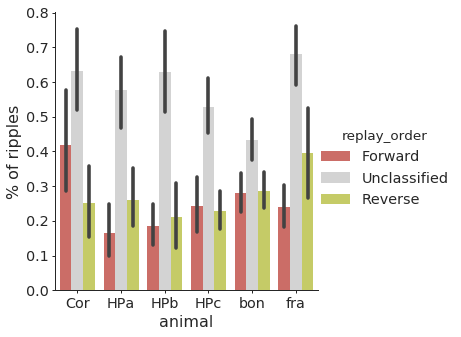

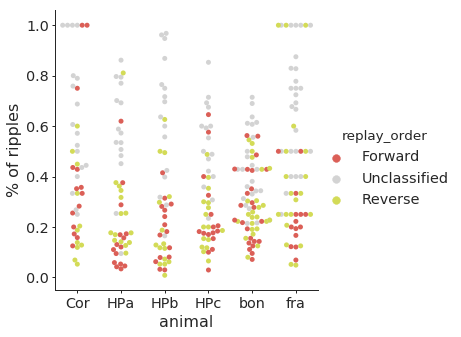

In [8]:
covariate = 'replay_order'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

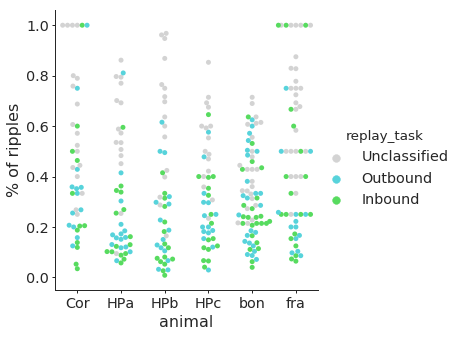

In [9]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

In [10]:
covariate = 'replay_motion'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

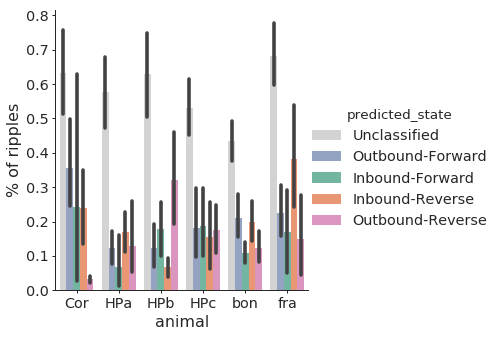

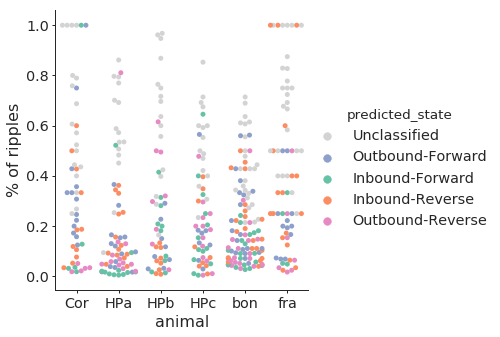

In [11]:
covariate = 'predicted_state'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

## Over Epochs

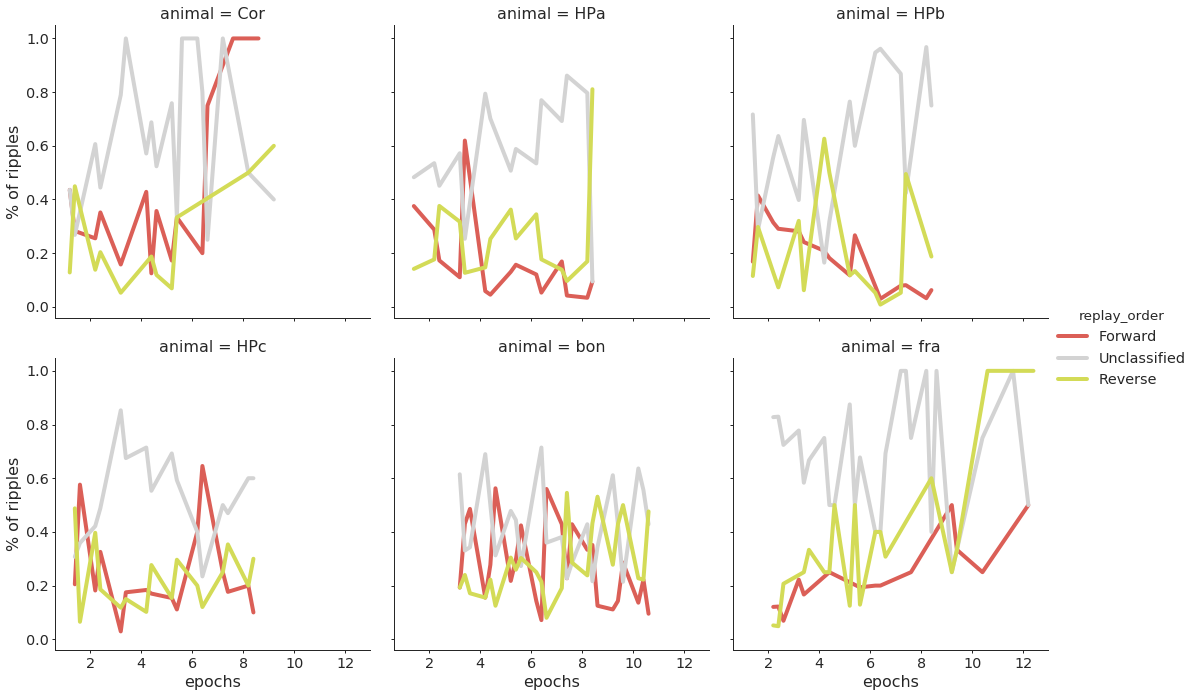

In [12]:
covariate = 'replay_order'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)

g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

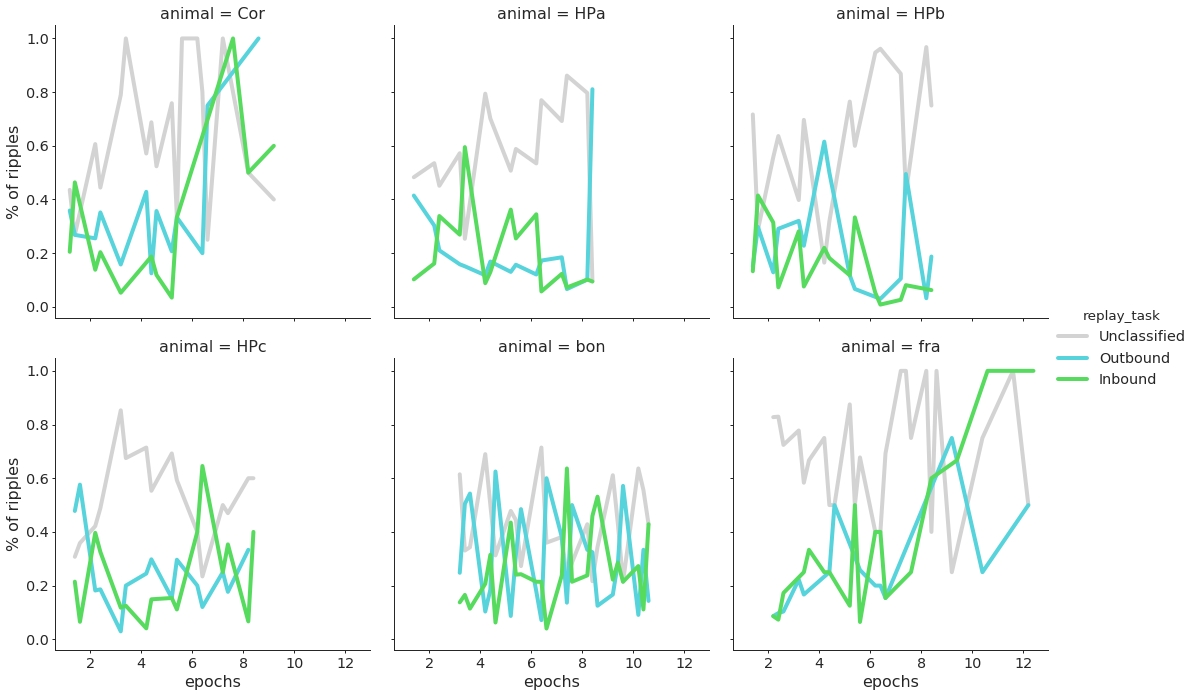

In [13]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

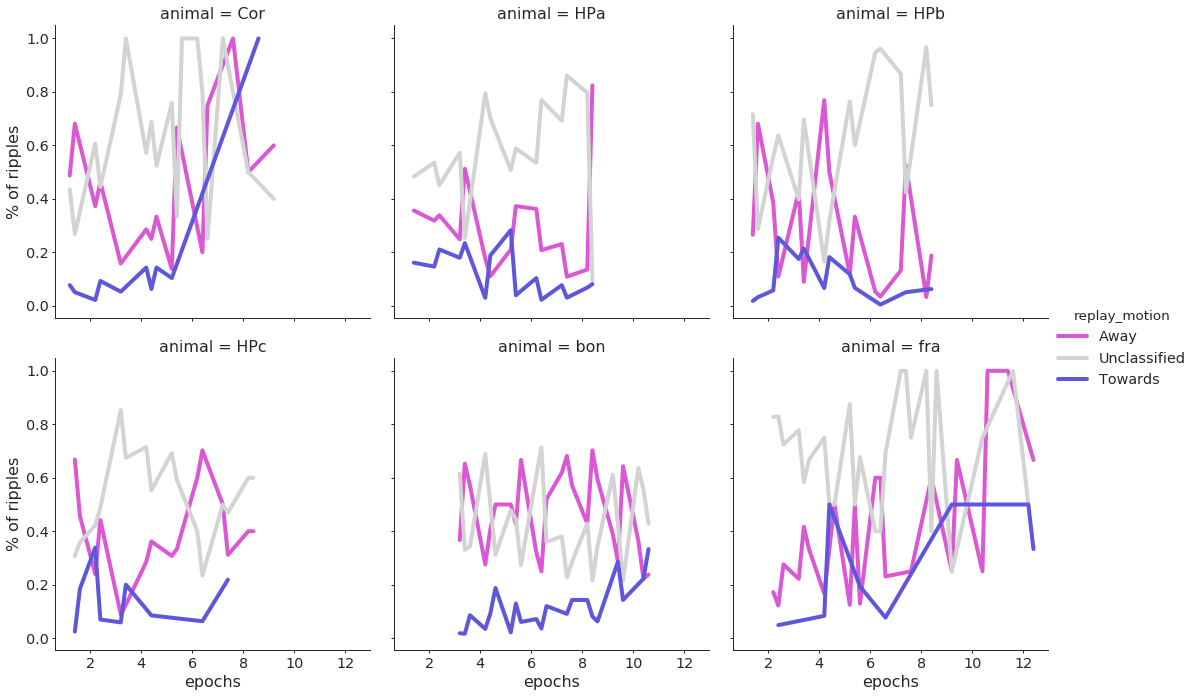

In [14]:
covariate = 'replay_motion'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

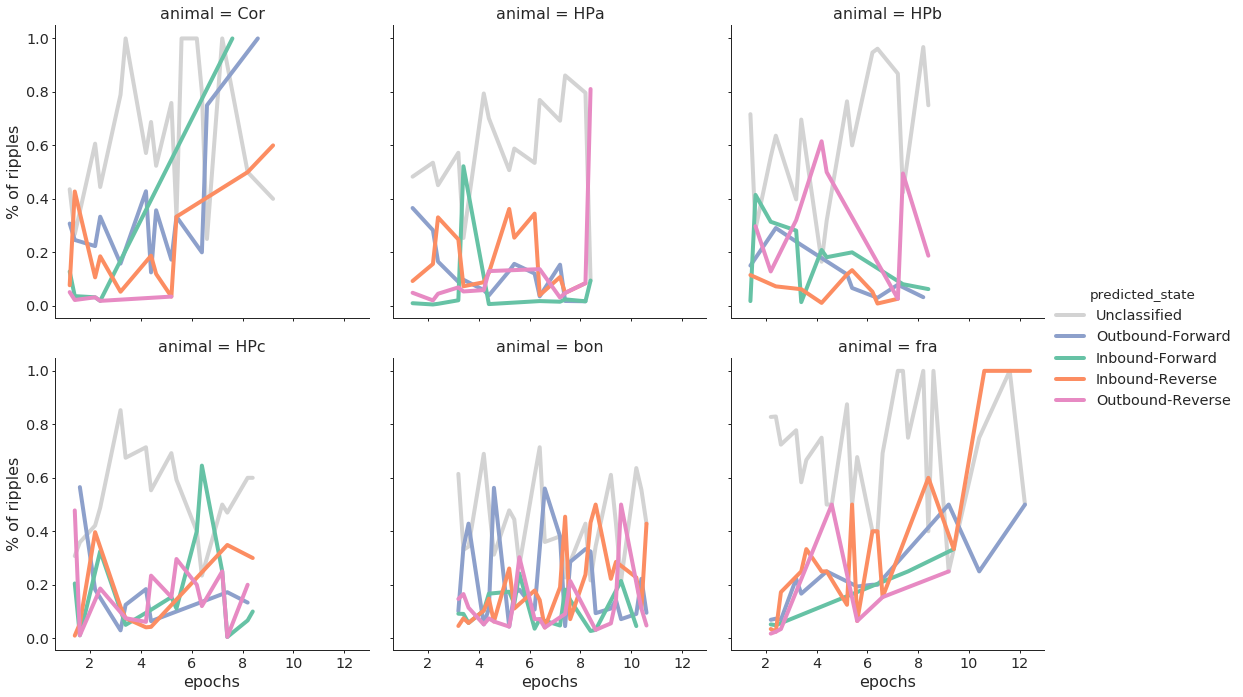

In [15]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

## Over Exposures

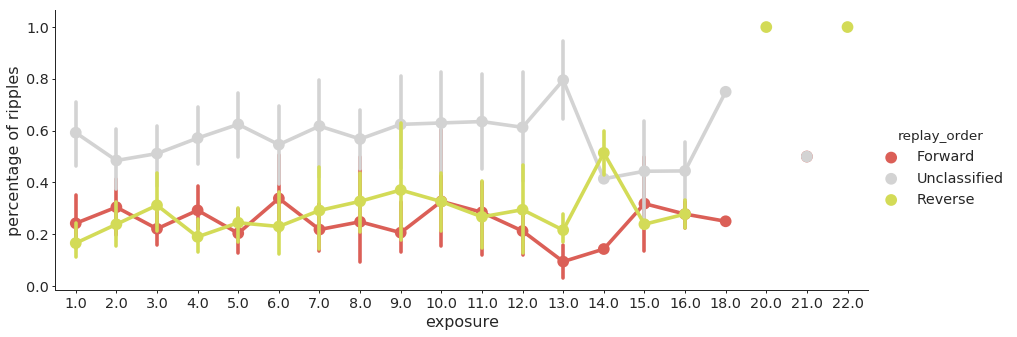

In [16]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

In [17]:
(replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index(covariate).join(epoch_info).reset_index())

animal  day  epoch  replay_order  percentage of ripples environment type  \
0      Cor    1      2       Forward               0.435897      TrackA  run   
1      Cor    1      2  Unclassified               0.435897      TrackA  run   
2      Cor    1      2       Reverse               0.128205      TrackA  run   
3      Cor    1      4       Reverse               0.449275      TrackA  run   
4      Cor    1      4       Forward               0.282609      TrackA  run   
5      Cor    1      4  Unclassified               0.268116      TrackA  run   
6      Cor    2      2  Unclassified               0.606383      TrackA  run   
7      Cor    2      2       Forward               0.255319      TrackA  run   
8      Cor    2      2       Reverse               0.138298      TrackA  run   
9      Cor    2      4  Unclassified               0.444444      TrackA  run   
10     Cor    2      4       Forward               0.351852      TrackA  run   
11     Cor    2      4       Reverse               0.203704      TrackA  run   
12     Cor    3      2  Unclassified               0.789474      TrackA  run   
13     Cor    3      2       Forward               0.157895      TrackA  run   
14     Cor    3      2       Reverse               0.052632      TrackA  run   
15     Cor    3      4  Unclassified               1.000000      TrackA  run   
16     Cor    4      2  Unclassified               0.571429      TrackA  run   
17     Cor    4      2       Forward               0.428571      TrackA  run   
18     Cor    4      4  Unclassified               0.687500      TrackB  run   
19     Cor    4      4       Reverse               0.187500      TrackB  run   
20     Cor    4      4       Forward               0.125000      TrackB  run   
21     Cor    4      6  Unclassified               0.523810      TrackB  run   
22     Cor    4      6       Forward               0.357143      TrackB  run   
23     Cor    4      6       Reverse               0.119048      TrackB  run   
24     Cor    5      2  Unclassified               0.758621      TrackA  run   
25     Cor    5      2       Forward               0.172414      TrackA  run   
26     Cor    5      2       Reverse               0.068966      TrackA  run   
27     Cor    5      4       Forward               0.333333      TrackB  run   
28     Cor    5      4       Reverse               0.333333      TrackB  run   
29     Cor    5      4  Unclassified               0.333333      TrackB  run   
..     ...  ...    ...           ...                    ...         ...  ...   
284    fra    6      2       Reverse               0.400000      TrackB  run   
285    fra    6      2  Unclassified               0.400000      TrackB  run   
286    fra    6      2       Forward               0.200000      TrackB  run   
287    fra    6      4       Reverse               0.400000      TrackB  run   
288    fra    6      4  Unclassified               0.400000      TrackB  run   
289    fra    6      4       Forward               0.200000      TrackB  run   
290    fra    6      6  Unclassified               0.692308      TrackA  run   
291    fra    6      6       Reverse               0.307692      TrackA  run   
292    fra    7      2  Unclassified               1.000000      TrackB  run   
293    fra    7      4  Unclassified               1.000000      TrackB  run   
294    fra    7      6  Unclassified               0.750000      TrackA  run   
295    fra    7      6       Forward               0.250000      TrackA  run   
296    fra    8      2  Unclassified               1.000000      TrackB  run   
297    fra    8      4       Reverse               0.600000      TrackB  run   
298    fra    8      4  Unclassified               0.400000      TrackB  run   
299    fra    8      6  Unclassified               1.000000      TrackA  run   
300    fra    9      2       Forward               0.500000      TrackB  run   
301    fra    9      2       Reverse               0.250000      TrackB  run   
302 

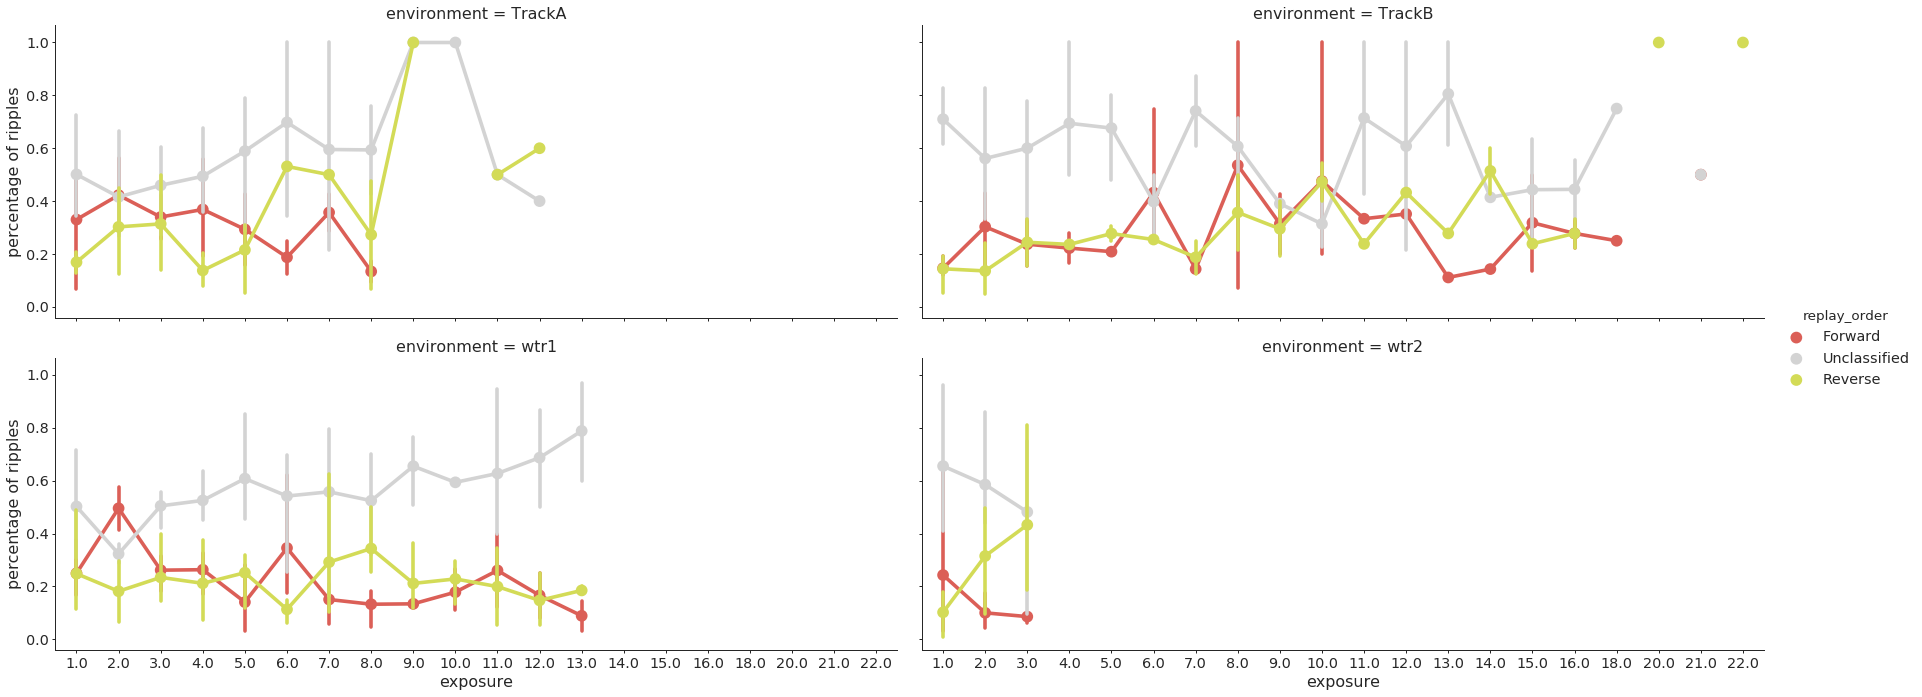

In [18]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index(covariate).join(epoch_info).reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5, col='environment', col_wrap=2);

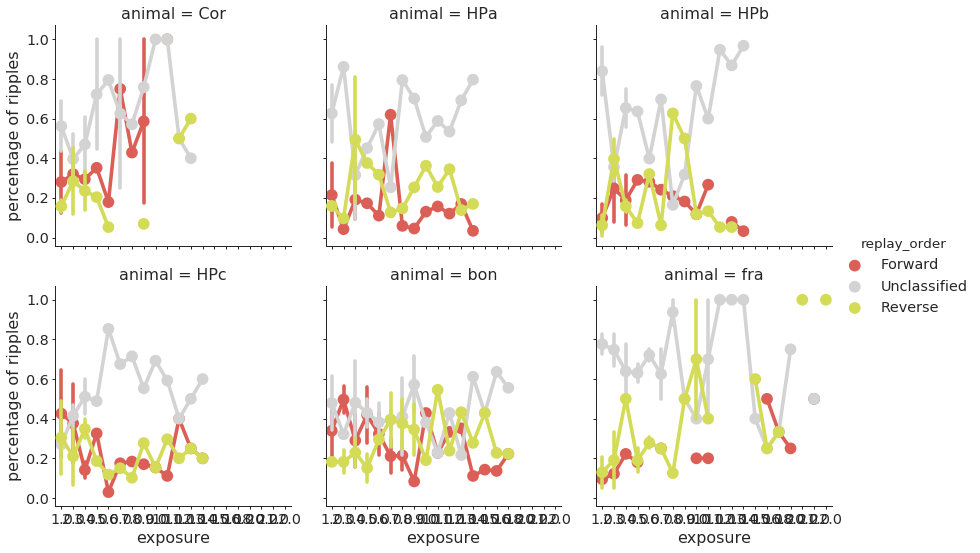

In [19]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

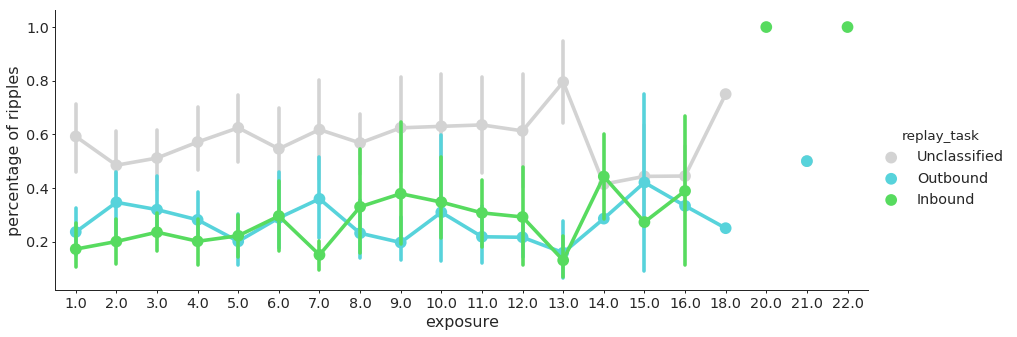

In [20]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

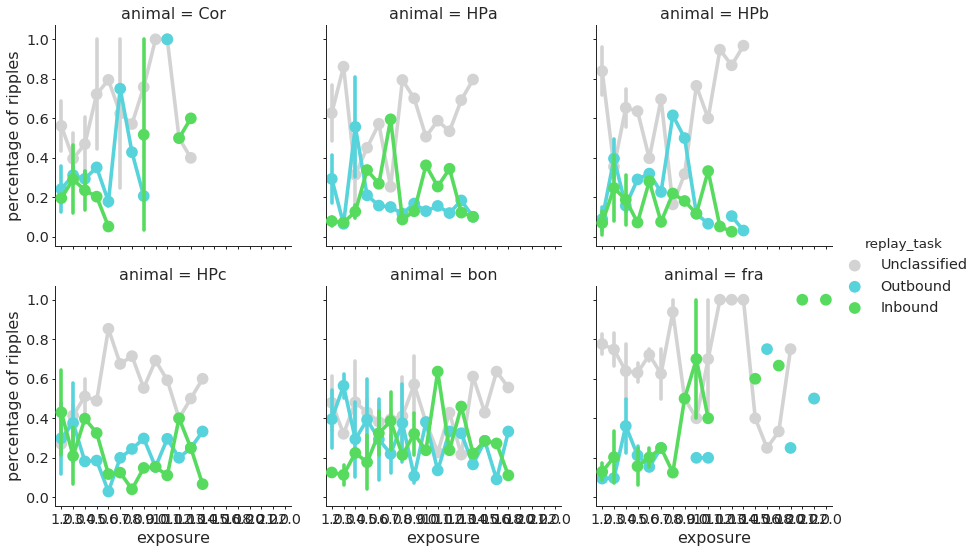

In [21]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

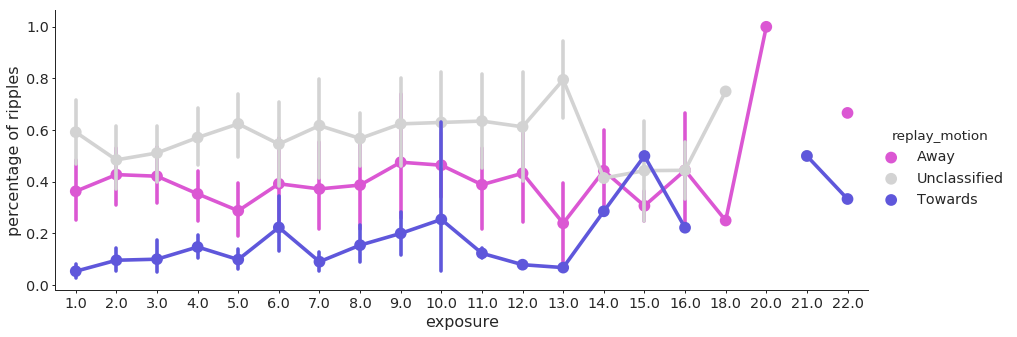

In [22]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

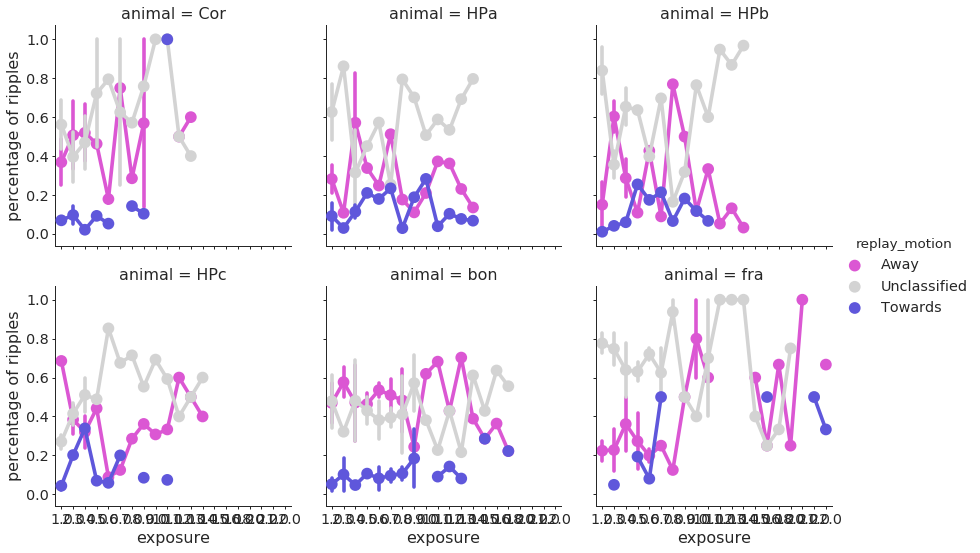

In [23]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

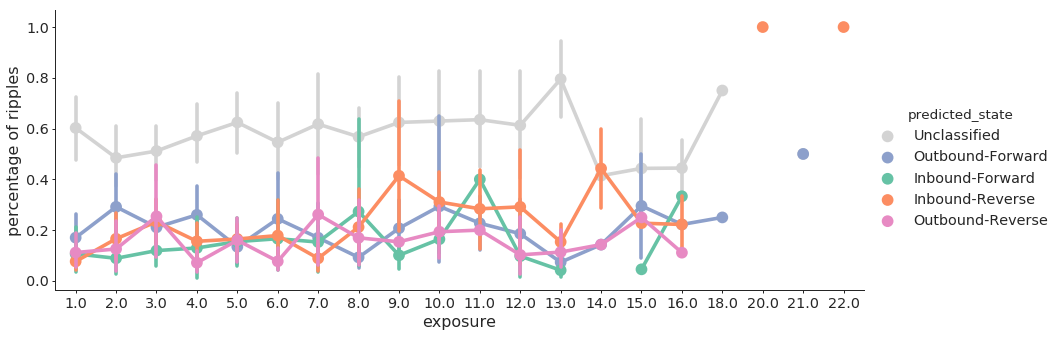

In [24]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

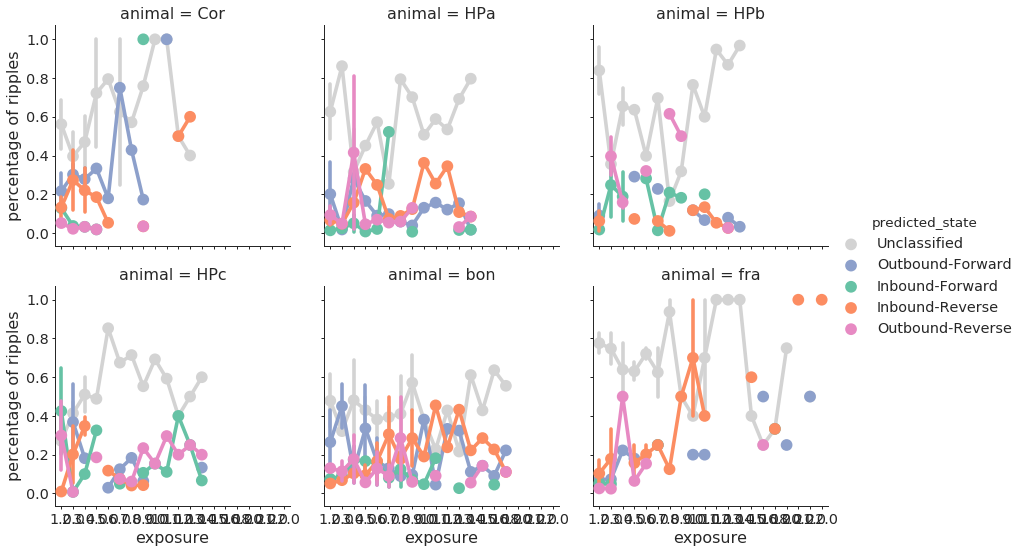

In [25]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

## Within session

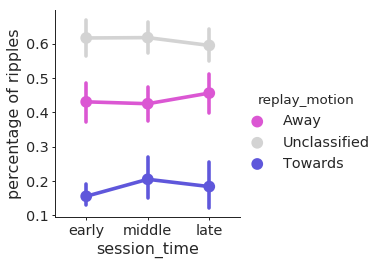

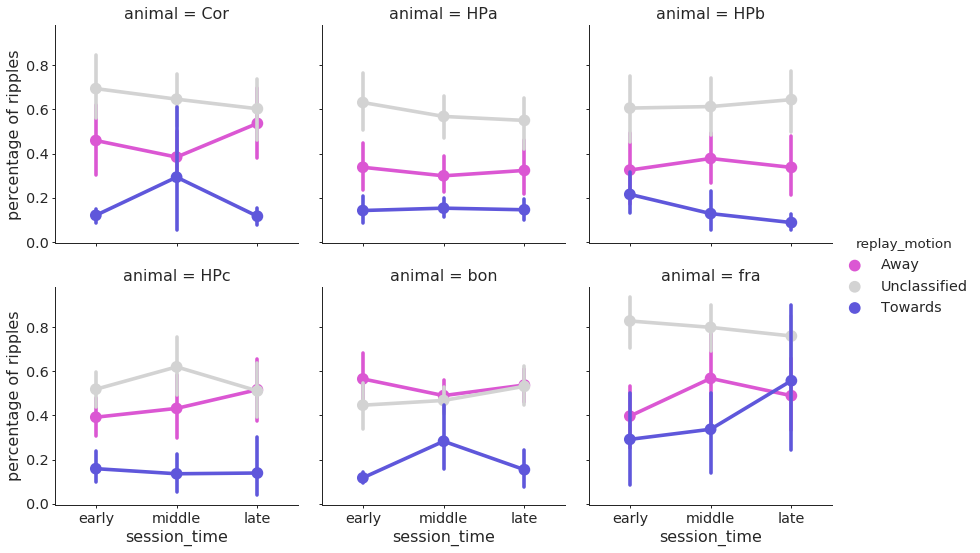

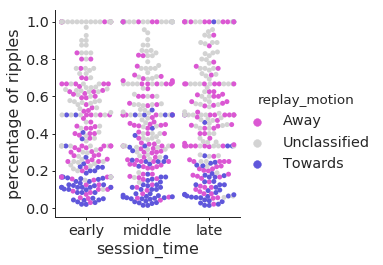

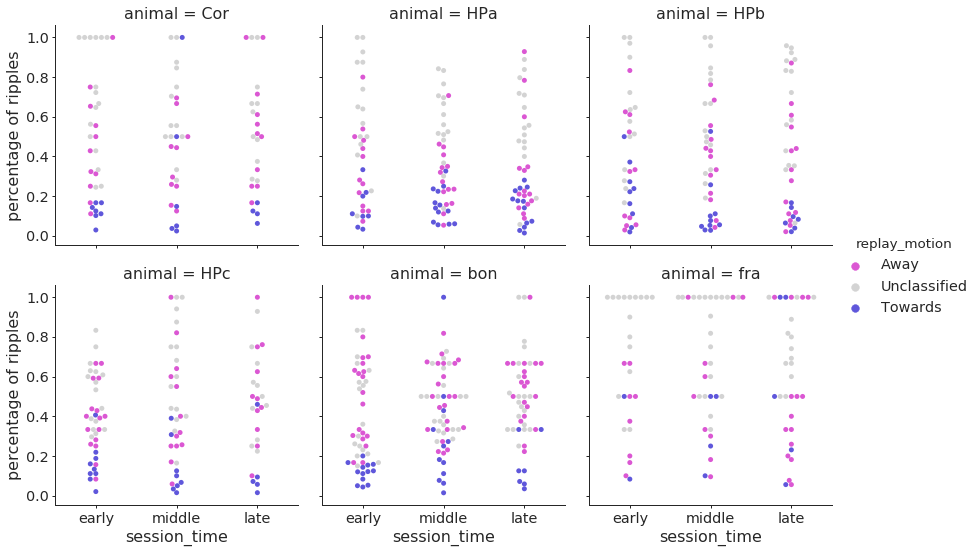

In [26]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

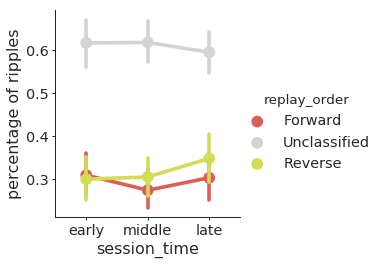

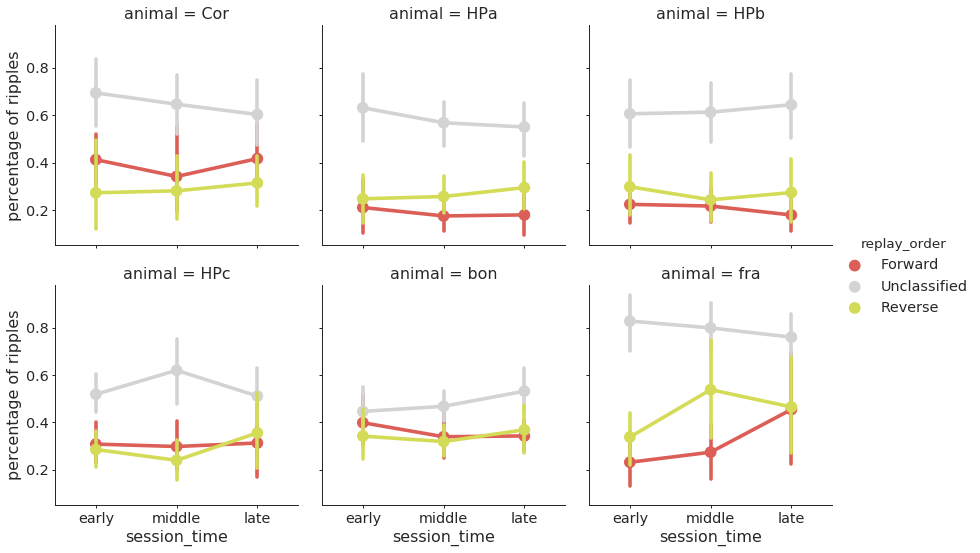

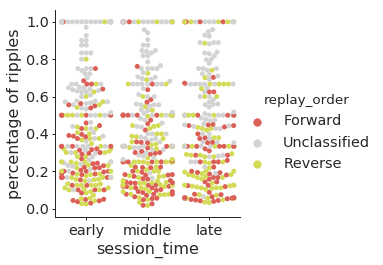

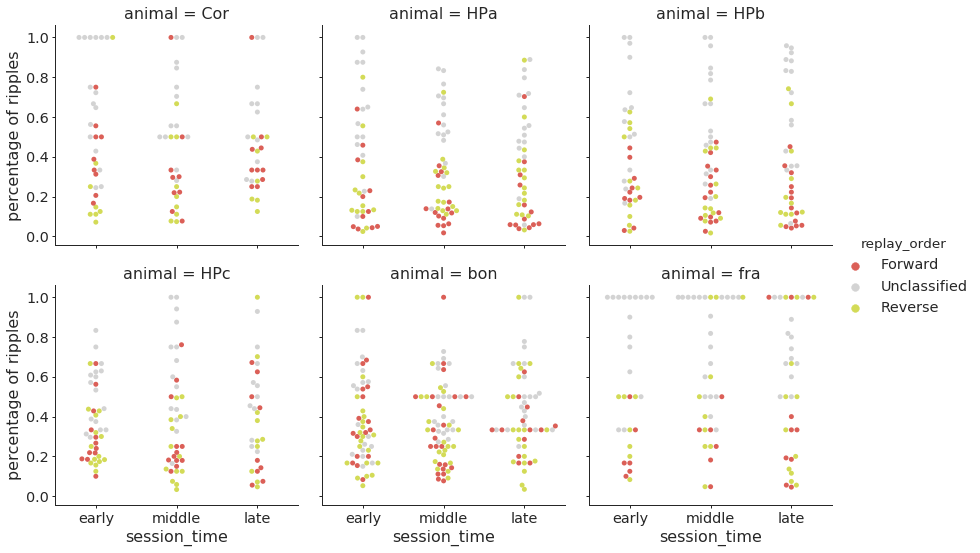

In [27]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

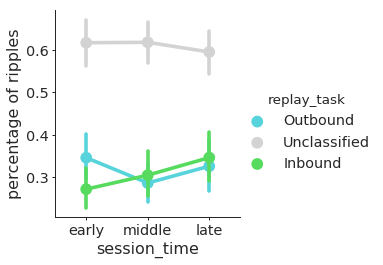

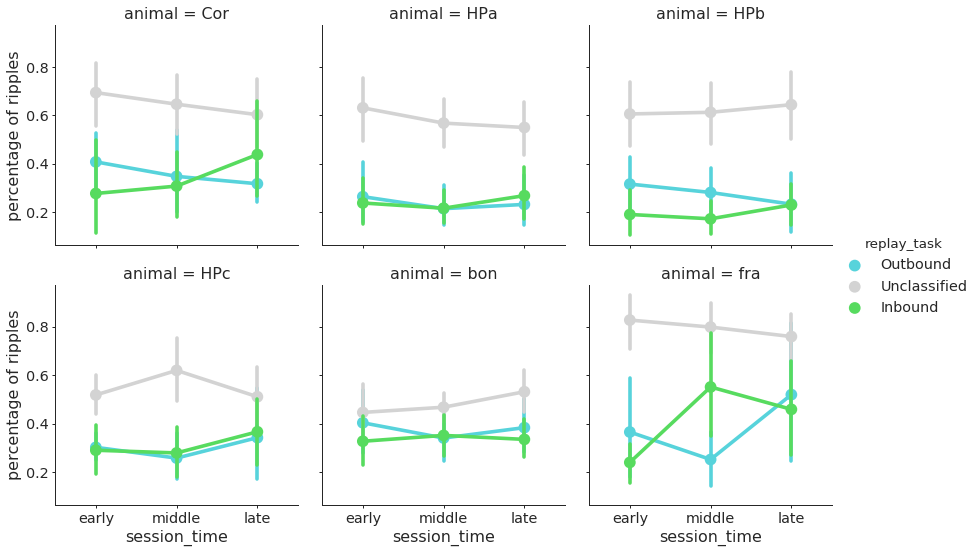

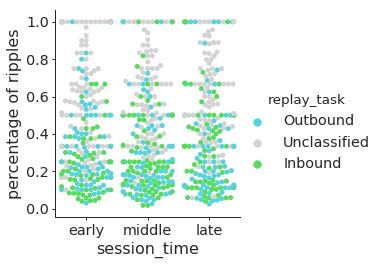

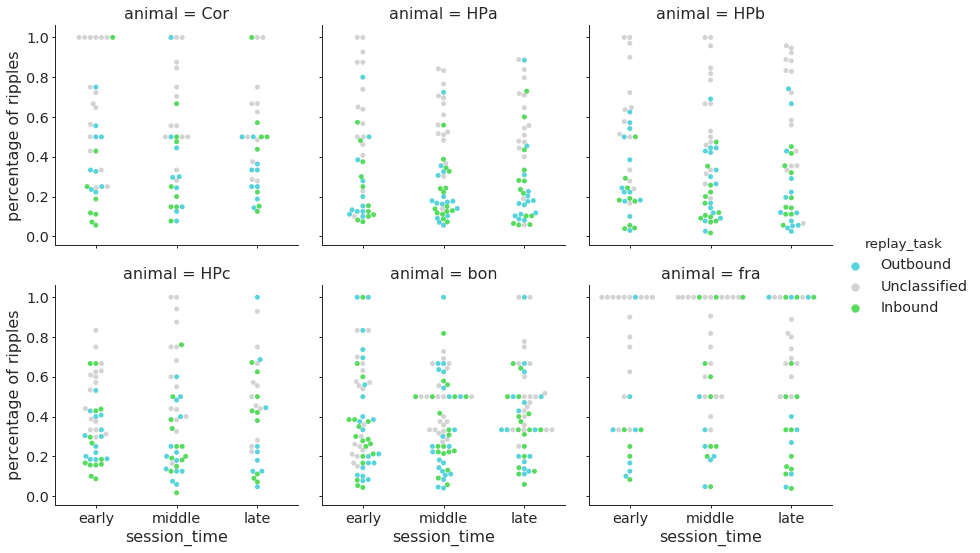

In [28]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

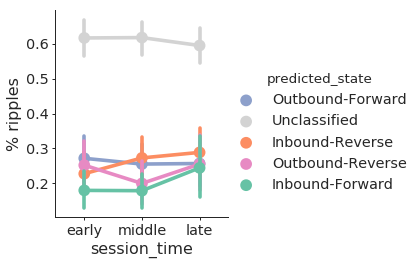

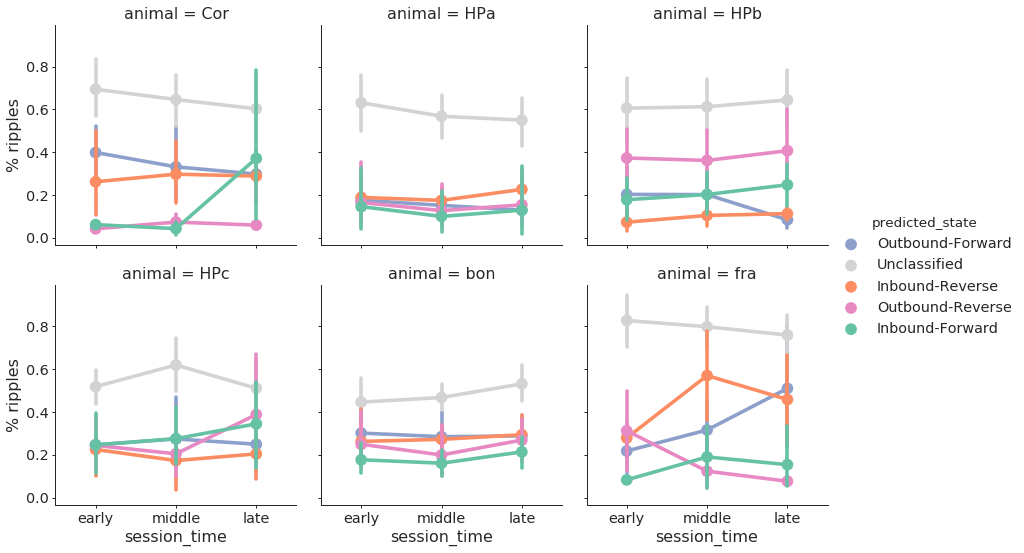

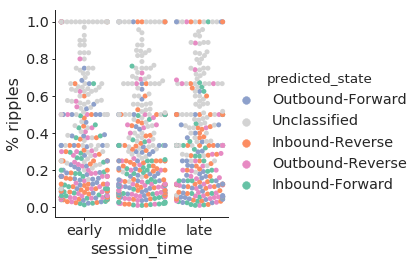

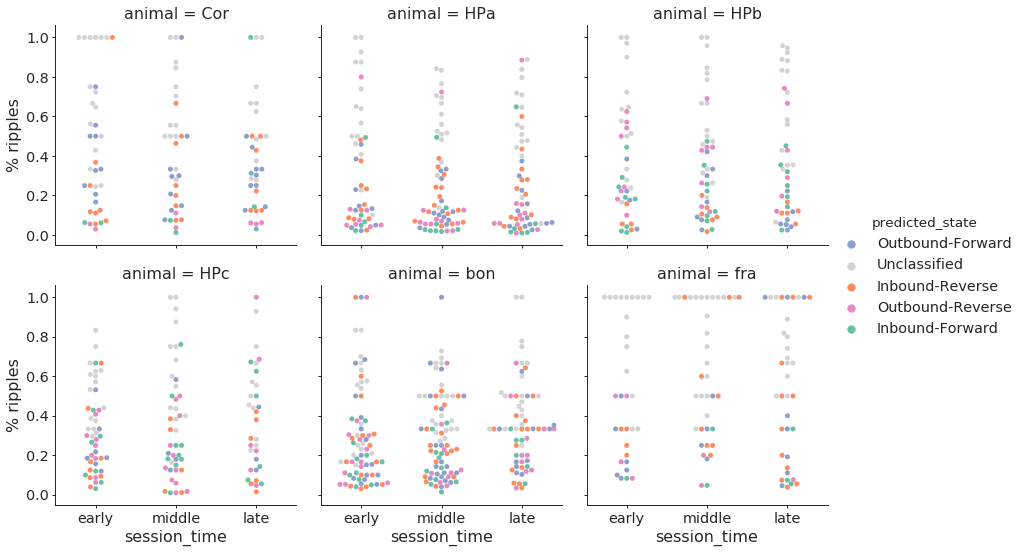

In [29]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('% ripples').reset_index())

sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, kind='swarm', palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

## Position of Animal during Replay Types

In [30]:
position_occupancy = (
    xr.open_mfdataset(PROCESSED_DATA_DIR + '/*.nc', group='position_occupancy')
    .to_dataframe()
    .set_index(['animal', 'day', 'epoch']))

In [31]:
po = position_occupancy.groupby(['animal', 'environment', 'center_x', 'center_y']).sum()

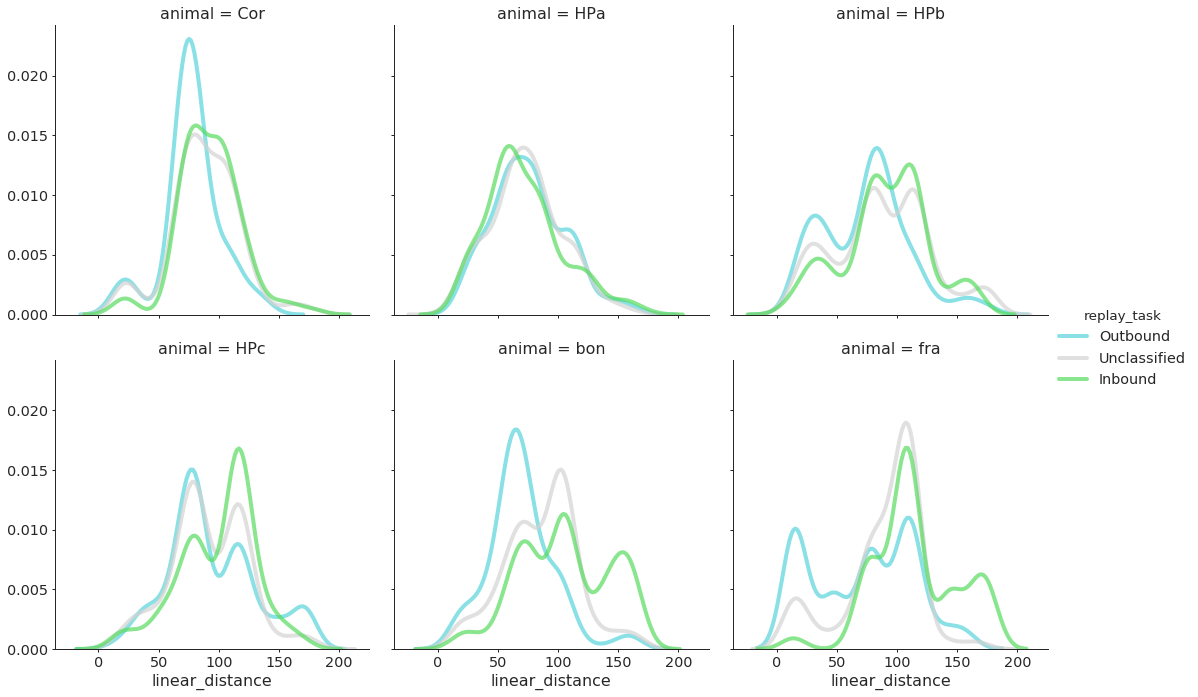

In [33]:
covariate = 'replay_task'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

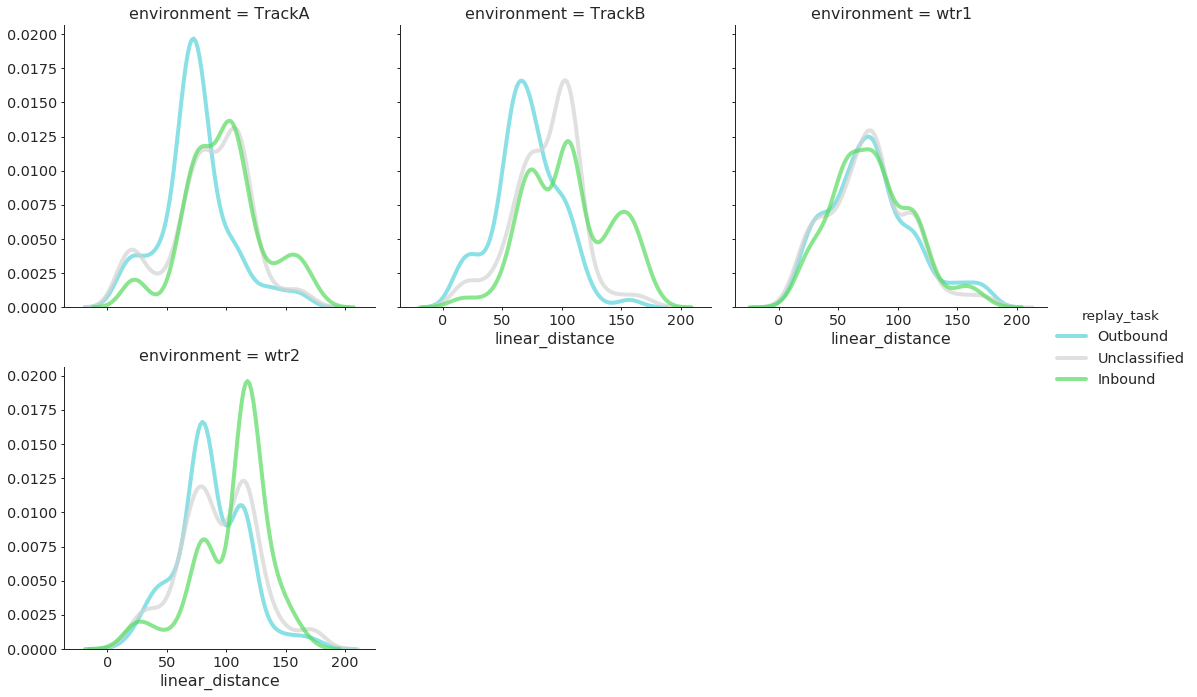

In [34]:
covariate = 'replay_task'
g = sns.FacetGrid(replay_info.reset_index(), col='environment', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

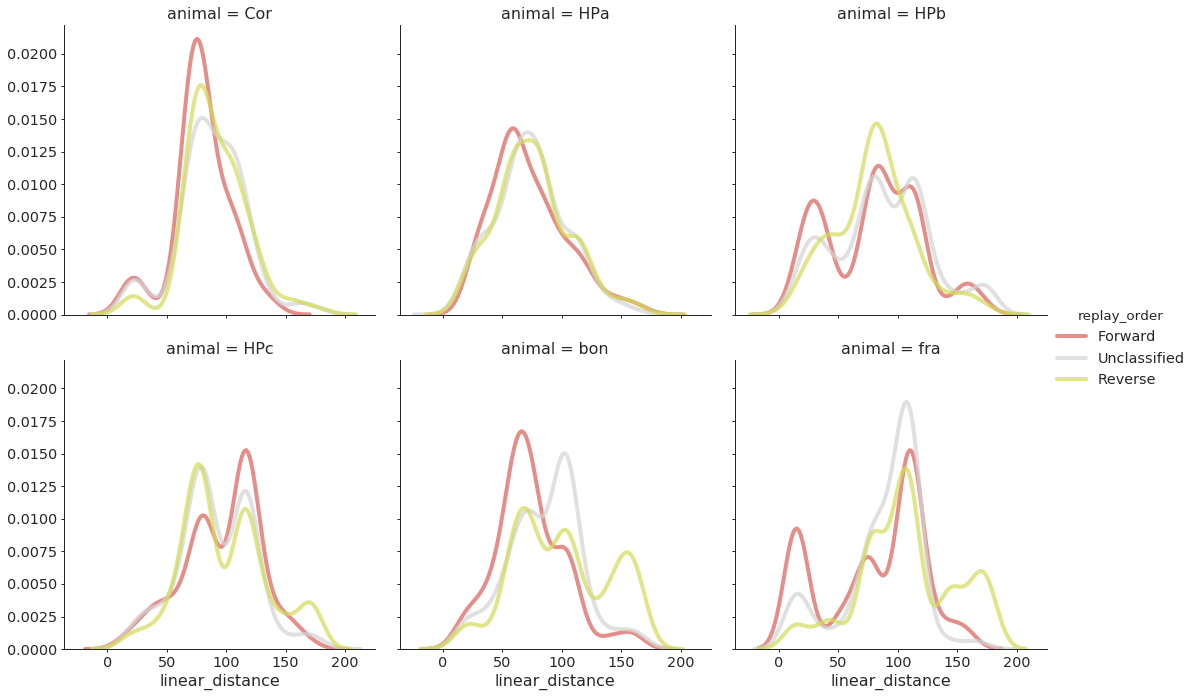

In [35]:
covariate = 'replay_order'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

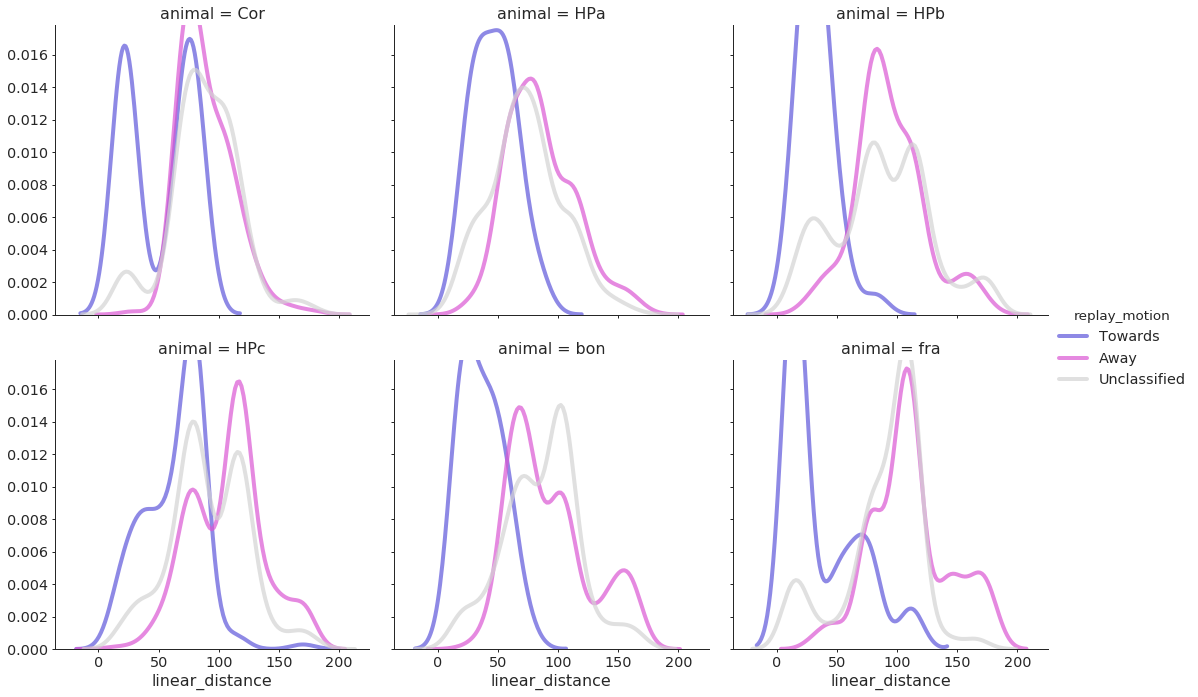

In [36]:
covariate = 'replay_motion'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

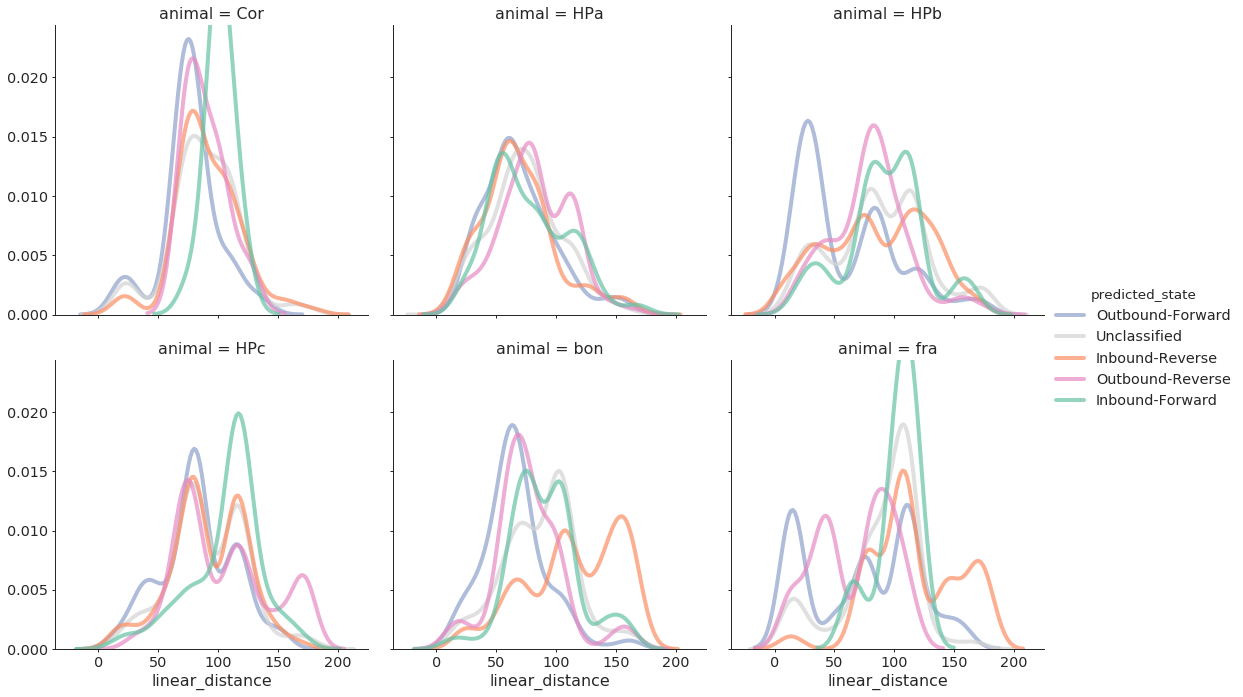

In [37]:
covariate = 'predicted_state'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

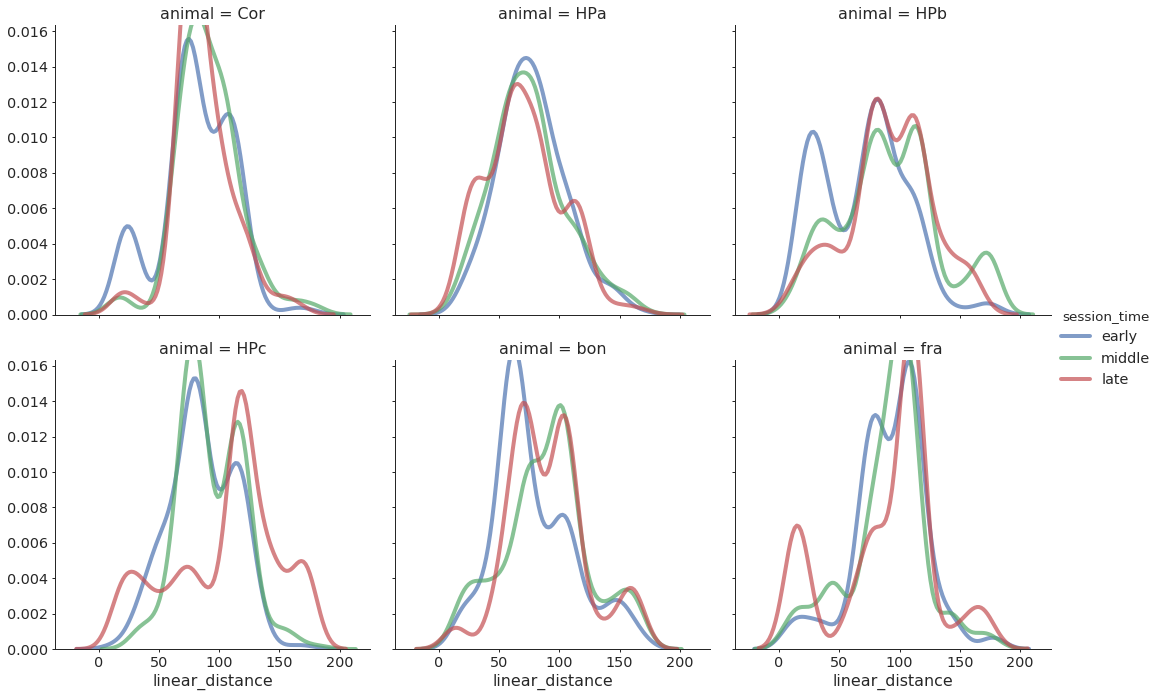

In [38]:
covariate = 'session_time'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

### Occupancy Normalized 

In [ ]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_task'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

In [ ]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_order'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

In [ ]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_motion'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

In [ ]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'session_time'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap='viridis', vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

In [ ]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'predicted_state'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)